In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('SBI Insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [5]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
data.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

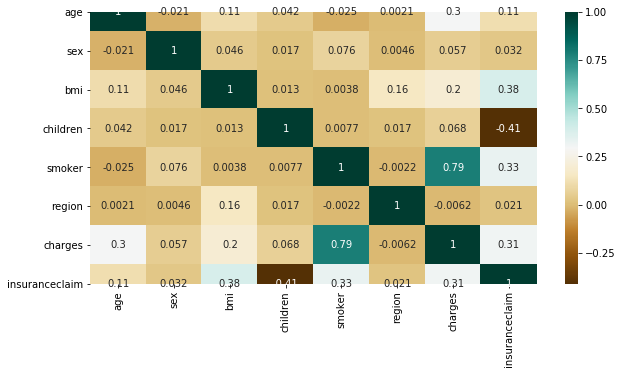

In [155]:
# Analyzing the relation between the independent and variables in the dataset.
# There is a high correlation between 'smoker' and 'charges' being paid for the insurance policy.
# This indicates that a 'smoker' is likely to pay higher charges for buying an insurance policy as compared to non-smoker. 
plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap="BrBG", annot = True)

In [10]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


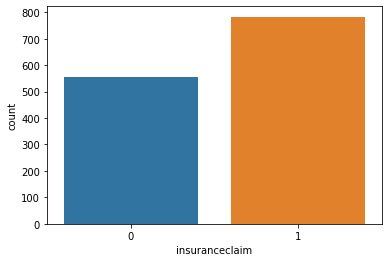

In [12]:
# Analyzing the count of insurance claim in the dataset
# There have been significant number of positive and negative claims  
sns.countplot(x='insuranceclaim', data=data)

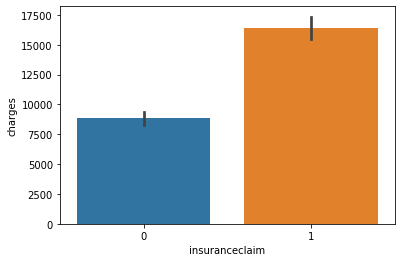

In [39]:
# Analyzing the claims based on the charges paid by the customers.
# The insurance claims have been higher from customers paying higher amount of charges.
sns.barplot(x='insuranceclaim', y='charges', data=data)

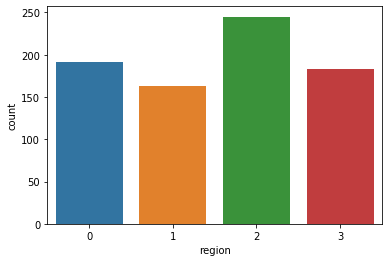

In [52]:
# Analyzing the claims based on customer regions.
# The insurance claims have been higher for customers from region 2.
sns.countplot(x='region', data=data.loc[data['insuranceclaim']==1])

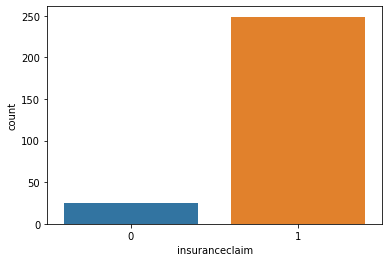

In [96]:
# Analyzing the claims based on smoking and non-smoking categories.
# The claims filed by 'smokers' category customers are much higher than non-smokers.
sns.countplot(x='insuranceclaim', data=data.loc[data['smoker']==1])

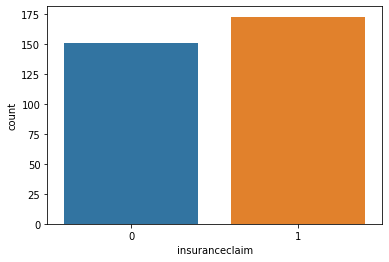

In [94]:
# Analyzing the claims based on customers having children.
# There is no significant difference in claims and no-claims from customers having children.
sns.countplot(x='insuranceclaim', data=data.loc[data['children']==1])

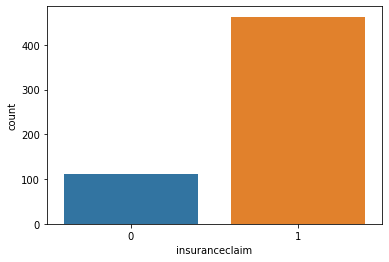

In [95]:
# Analyzing the claims based on customers not having children.
# There a significant difference in claims and no-claims from customers having no children.
sns.countplot(x='insuranceclaim', data=data.loc[data['children']==0])

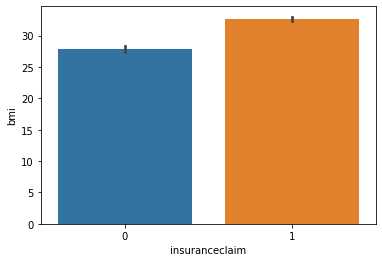

In [100]:
# Analyzing the claims based on the bmi.
# Insurance claims are higher from customers with average bmi more than 25.
sns.barplot(x='insuranceclaim', y='bmi', data=data)

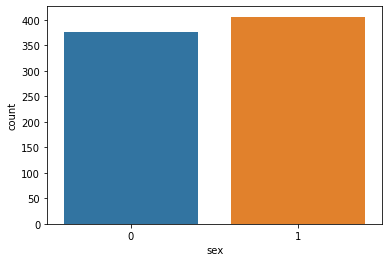

In [105]:
# Analyzing the claims based on the sex.
# There are almost equal number of claims filed by male and female customers.
sns.countplot(x='sex', data=data.loc[data['insuranceclaim']==1])

(array([144.,  74.,  40.,  52.,  42.,  91.,  90.,  78.,  90.,  82.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

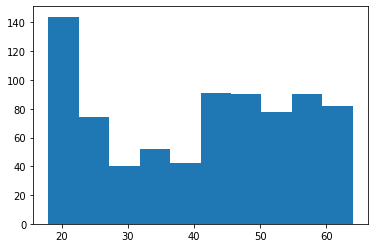

In [62]:
# Analyzing the claims for customers from different age groups.
# The insurance claims have been higher for customers in the age group 20s.
plt.hist(x='age', data=data.loc[data['insuranceclaim']==1])

In [107]:
# Splitting the data into dependent and independent variables
x=data.iloc[:,0:7]
y=data.iloc[:,-1]

In [109]:
x

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [110]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [113]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
a=sc.transform(x)
x=pd.DataFrame(a,columns=x.columns)

In [116]:
from sklearn.metrics import f1_score
def maxf1score(cm,x,y):
    maxf1=0
    rs=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20, stratify=y)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        fsc=f1_score(y_test,y_pred)
        if fsc>maxf1:
            maxf1=fsc
            rs=r_state
    print("Maximum f1_score is at random state :",rs," and it is :",maxf1)

In [118]:
# Using Logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
maxf1score(lr,x,y)

Maximum f1_score is at random state : 101  and it is : 0.9316770186335404


In [131]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for f1 is:', cross_val_score(lr,x,y,cv=5,scoring="f1").mean())
print("Standard deviation in f1 score is: ",cross_val_score(lr,x,y,cv=5,scoring="f1").std())

Mean cross validation score for f1 is: 0.8974301207825608
Standard deviation in f1 score is:  0.013247504030284553


In [125]:
# Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
maxf1score(dtc,x,y)

Maximum f1_score is at random state : 145  and it is : 1.0


In [132]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for f1 is:', cross_val_score(dtc,x,y,cv=5,scoring="f1").mean())
print("Standard deviation in f1 score is: ",cross_val_score(dtc,x,y,cv=5,scoring="f1").std())

Mean cross validation score for f1 is: 0.9784037999207907
Standard deviation in f1 score is:  0.009446450551871516


In [133]:
# Using SVM
from sklearn.svm import SVC
svc=SVC()
maxf1score(svc,x,y)

Maximum f1_score is at random state : 86  and it is : 0.9449838187702265


In [134]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for f1 is:', cross_val_score(svc,x,y,cv=5,scoring="f1").mean())
print("Standard deviation in f1 score is: ",cross_val_score(svc,x,y,cv=5,scoring="f1").std())

Mean cross validation score for f1 is: 0.9135014178597552
Standard deviation in f1 score is:  0.019314636689359753


In [137]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parametersknn={'n_neighbors':[5,6,7,8,9,10]}
knn1 = GridSearchCV(knn, parametersknn, cv=5,scoring="f1")
knn1.fit(x,y)
knn1.best_params_

{'n_neighbors': 5}

In [142]:
knn=KNeighborsClassifier(n_neighbors=5)
maxf1score(knn,x,y)

Maximum f1_score is at random state : 97  and it is : 0.9389067524115756


In [143]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for f1 is:', cross_val_score(knn,x,y,cv=5,scoring="f1").mean())
print("Standard deviation in f1 score is: ",cross_val_score(knn,x,y,cv=5,scoring="f1").std())

Mean cross validation score for f1 is: 0.9007364341296752
Standard deviation in f1 score is:  0.01451620161183077


In [144]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parametersrfc={'n_estimators':[100,150,200,250,300]}
rfc1 = GridSearchCV(rfc, parametersrfc, cv=5,scoring="f1")
rfc1.fit(x,y)
rfc1.best_params_

{'n_estimators': 200}

In [145]:
rfc=RandomForestClassifier(n_estimators=100)
maxf1score(rfc,x,y)

Maximum f1_score is at random state : 126  and it is : 0.9872611464968153


In [146]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for f1 is:', cross_val_score(rfc,x,y,cv=5,scoring="f1").mean())
print("Standard deviation in f1 score is: ",cross_val_score(rfc,x,y,cv=5,scoring="f1").std())

Mean cross validation score for f1 is: 0.960065181137829
Standard deviation in f1 score is:  0.0097586861724669


In [153]:
# Among all the models, DecisionTreeClassifier is the best performing model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 145,test_size=0.20,stratify=y)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print('classification_report \n', classification_report(y_test,y_pred))
print('f1 score: ', f1_score(y_test,y_pred))
print('Confusion matrix \n', confusion_matrix(y_test,y_pred))
print('AUC ROC Score: ', roc_auc_score(y_test,y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       1.00      0.99      1.00       157

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

f1 score:  0.9968051118210862
Confusion matrix 
 [[111   0]
 [  1 156]]
AUC ROC Score:  0.9968152866242038


In [154]:
# Saving the decision tree model
from sklearn.externals import joblib 
joblib.dump(dtc, 'SBI_insurance_dtc.pkl')

['SBI_insurance_dtc.pkl']